In [5]:
!pip install gensim


In [6]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [7]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[==================================================] 100.0% 128.1/128.1MB downloaded
[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [8]:
#find the most similar words to a word of your choice.
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

cake = model['cake']
print(model.most_similar('cake'))


# I think that it does make sense, a lot of the similar words are toppings that go on a cake or similar desserts.

[('cakes', 0.8047241568565369), ('chocolate', 0.7893113493919373), ('pie', 0.7703179717063904), ('dessert', 0.7649705410003662), ('bread', 0.7605516910552979), ('frosting', 0.7601187825202942), ('cookie', 0.7544960975646973), ('cookies', 0.7488498687744141), ('baked', 0.7466464638710022), ('pudding', 0.7463829517364502)]


In [9]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [10]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [11]:
#try to isolate a specific dimension in the embeddings and add it to multiple words.
#does this show any bias or assumptions in the data?
# Discuss with your group and share most interesting dimension in the document

culture =model["germany"]-model["european"]

print(model.most_similar(culture))
print(model.most_similar(-culture))

model.most_similar(model["wars"]+culture)

# I found it interesting that the model talked about nazis, WW2, soviets, and the horrors that the Germans committed.

[('woerle', 0.5768790245056152), ('zverev', 0.5627171993255615), ('begerow', 0.5411931872367859), ('meeuw', 0.5331881642341614), ('buchenwald', 0.5277826189994812), ('thuringia', 0.5252097845077515), ('karbacher', 0.5152987837791443), ('pretzsch', 0.5151122808456421), ('kandarr', 0.5148569941520691), ('buder', 0.5140668153762817)]
[('pba', 0.42566847801208496), ('ceylonese', 0.42031970620155334), ('arfu', 0.41158297657966614), ('north-american', 0.40113985538482666), ('ipl', 0.3987862467765808), ('acb', 0.3973730802536011), ('intergovernmental', 0.3966253697872162), ('verifiers', 0.38204845786094666), ('dhow', 0.37596186995506287), ('igad', 0.3742261528968811)]


[('wars', 0.7226685285568237),
 ('war', 0.6390854716300964),
 ('horrors', 0.5748347043991089),
 ('fought', 0.5627440810203552),
 ('battles', 0.5400225520133972),
 ('ii', 0.5365453362464905),
 ('nazi', 0.5261518955230713),
 ('waged', 0.5259268879890442),
 ('nazis', 0.5258271098136902),
 ('soviets', 0.5220761299133301)]

Part 2: Visualization and Embeddings in Space

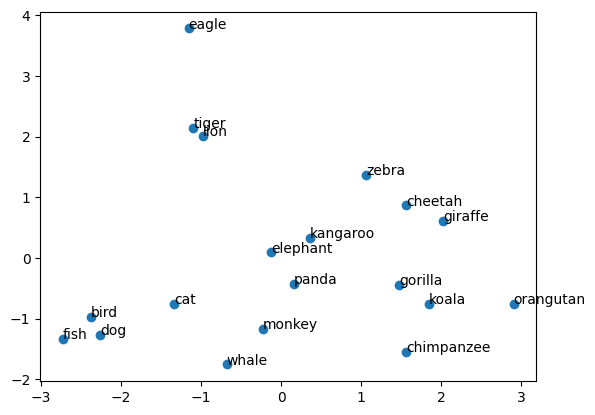

In [12]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

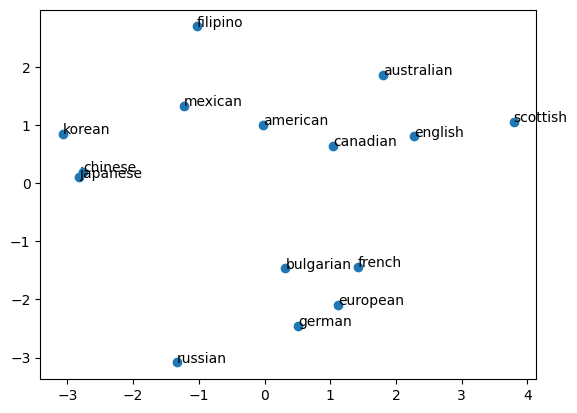

In [13]:
#repeat this process with your own set of 10-20 words.
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

words=['american', 'canadian', 'mexican', 'european', 'german', 'french', 'english', 'scottish', 'chinese', 'filipino', 'japanese', 'korean', 'australian', 'russian', 'bulgarian']

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


# Going off of a bunch of cultures, some parts make sense while others make less sense. The Asian countries are together, but the Phillipines is not included.
# The same is with English and Scottish from the rest of the European countries. It actually seems like English is more connected with Canadians and Australians
# Russians seem to be closer to Europeans than The Asians

In [14]:
# repeat the process with a different pre-trained model and the same set of words.
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


[==================================================] 100.0% 387.1/387.1MB downloaded


Part 3: Embedding reddit posts

In [15]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv('uiuc.csv')
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

data.head()


Unnamed: 0                 date  post_votes  \
0           0  2024-09-04 14:43:40           2   
1           1  2024-09-04 14:43:40           2   
2           2  2024-09-04 12:52:08           3   
3           3  2024-09-04 12:52:08           3   
4           4  2024-09-04 12:52:08           3   

                                                text           user  \
0  Have the same professor! And in lecture he did...       zhen3441   
1  Do you find it helpful to still go to the lect...        Kai2747   
2  Have you tried emailing University Housing to ...  TurboBKTastic   
3  Purchasing Illini Cash should get you added to...     HoosierCAB   
4  Just did, thanks for the suggestion! It hadn't...    Sector-Both   

   com_votes  label  
0          2      1  
1          1      1  
2          2      1  
3          2      1  
4          1      1

In [16]:
#using the code from project 1, clean the text and create a bag of words representation of the text
from sklearn.feature_extraction.text import CountVectorizer

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
data.head()

Unnamed: 0                 date  post_votes  \
0           0  2024-09-04 14:43:40           2   
1           1  2024-09-04 14:43:40           2   
2           2  2024-09-04 12:52:08           3   
3           3  2024-09-04 12:52:08           3   
4           4  2024-09-04 12:52:08           3   

                                                text           user  \
0  Have the same professor! And in lecture he did...       zhen3441   
1  Do you find it helpful to still go to the lect...        Kai2747   
2  Have you tried emailing University Housing to ...  TurboBKTastic   
3  Purchasing Illini Cash should get you added to...     HoosierCAB   
4  Just did, thanks for the suggestion! It hadn't...    Sector-Both   

   com_votes  label                                       cleaned_text  
0          2      1  have the same professor and in lecture he did ...  
1          1      1  do you find it helpful to still go to the lect...  
2          2      1  have you tried emailing university housing to ...  
3          2      1  purchasing illini cash should get you added to...  
4          1      1  just did thanks for the suggestion it hadnt oc...

In [17]:
data['cleaned_text']

0       have the same professor and in lecture he did ...
1       do you find it helpful to still go to the lect...
2       have you tried emailing university housing to ...
3       purchasing illini cash should get you added to...
4       just did thanks for the suggestion it hadnt oc...
                              ...                        
425                                bros hating after dark
5491                                            thank you
6544    its honestly up to you guys i was on the rd fl...
1558    i get it the weathers been pretty wild lately ...
2770    about  minutes away wanted something on campus...
Name: cleaned_text, Length: 9450, dtype: object

In [18]:
bag_of_words

<9450x16138 sparse matrix of type '<class 'numpy.int64'>'
	with 225825 stored elements in Compressed Sparse Row format>

<ipython-input-20-f523f62237cd>:13: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('UMich', 'UIUC')


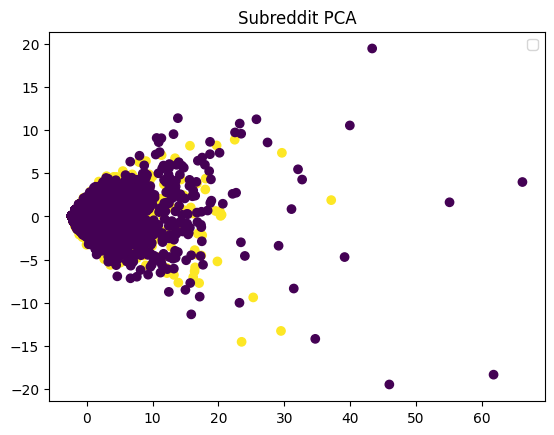

In [20]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns?

X=bag_of_words

pca=PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.scatter(X_pca[:,0], X_pca[:,1], c=data['label'])
plt.legend('UMich', 'UIUC')
plt.title('Subreddit PCA')
plt.show()

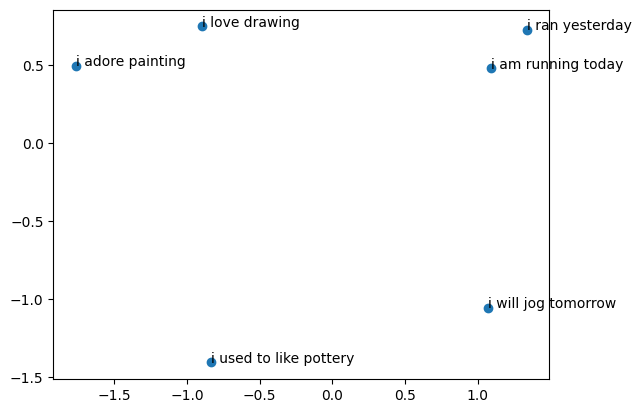

In [21]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [22]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation?

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49709 (\N{HANGUL SYLLABLE SUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\

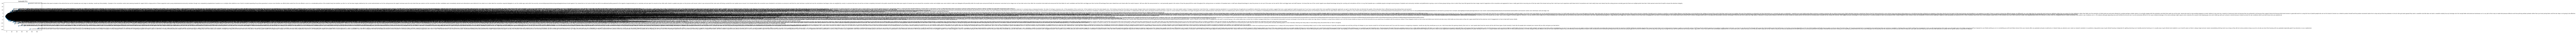

<Figure size 800x600 with 0 Axes>

In [23]:
X = bag_of_words
sentences = data['cleaned_text']

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]

#we can then plot the pca of these embeddings
pca=PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.title('Subreddit PCA')
plt.figure(figsize=(8, 6))
plt.show()



Part 4: HuggingFace and BERT

In [24]:
!pip install transformers

In [25]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [26]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [44]:
df_abridged = data.head(2000)

In [45]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
def getSentiment(post):
  if len(post) > 128:
    post = post[:128]
  return pipe(post)


df_abridged['sentiment'] = df_abridged['cleaned_text'].apply(getSentiment)
df_abridged.head()

<ipython-input-45-fc578bb29f95>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abridged['sentiment'] = df_abridged['cleaned_text'].apply(getSentiment)


Unnamed: 0                 date  post_votes  \
0           0  2024-09-04 14:43:40           2   
1           1  2024-09-04 14:43:40           2   
2           2  2024-09-04 12:52:08           3   
3           3  2024-09-04 12:52:08           3   
4           4  2024-09-04 12:52:08           3   

                                                text           user  \
0  Have the same professor! And in lecture he did...       zhen3441   
1  Do you find it helpful to still go to the lect...        Kai2747   
2  Have you tried emailing University Housing to ...  TurboBKTastic   
3  Purchasing Illini Cash should get you added to...     HoosierCAB   
4  Just did, thanks for the suggestion! It hadn't...    Sector-Both   

   com_votes  label                                       cleaned_text  \
0          2      1  have the same professor and in lecture he did ...   
1          1      1  do you find it helpful to still go to the lect...   
2          2      1  have you tried emailing university housing to ...   
3          2      1  purchasing illini cash should get you added to...   
4          1      1  just did thanks for the suggestion it hadnt oc...   

                                         sentiment  
0  [{'label': 'NEU', 'score': 0.9578511118888855}]  
1  [{'label': 'NEG', 'score': 0.8926571607589722}]  
2  [{'label': 'NEU', 'score': 0.9711514115333557}]  
3  [{'label': 'NEU', 'score': 0.9593181610107422}]  
4  [{'label': 'POS', 'score': 0.8319514989852905}]

In [49]:
df_abridged['sentiment_label'] = df_abridged['sentiment'].apply(lambda x: x[0]['label'])
df_abridged[['sentiment_label', 'label']]

<ipython-input-49-e22bf847f2f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abridged['sentiment_label'] = df_abridged['sentiment'].apply(lambda x: x[0]['label'])


sentiment_label  label
0                NEU      1
1                NEG      1
2                NEU      1
3                NEU      1
4                POS      1
...              ...    ...
1995             NEU      1
1996             NEU      1
1997             NEU      1
1998             NEU      1
1999             NEG      1

[2000 rows x 2 columns]

In [50]:
df_abridged['sentiment_label'].value_counts()

#Mostly neutral

sentiment_label
NEU    1218
NEG     427
POS     355
Name: count, dtype: int64

In [53]:
#look at ten sample posts and labels; do you agree with all of them?
df_abridged[['cleaned_text', 'sentiment_label']].sample(10)

# first two are neutral, just giving stories
# 3rd is negatively against bikers
# 4,5,6 is all random stuff so neutral
# 7 is neutral since it only gives facts
# 8 i thought was neutral
# 9 i agreed is negative since it's pretty sarcastic
# 10 is an observation or neutral

cleaned_text sentiment_label
7     i used to have the same problem you just have ...             NEU
1702  my associates took me three years because of c...             NEU
529   no they dont the vast majority despise these p...             NEG
1795                               lemme get that venmo             NEU
52                                         never forget             NEU
866                 not like we used to  ai has invaded             NEU
615   in step  did you check the enable airgroup box...             NEU
1026  oh wow those are things i havent heard anyone ...             POS
27                    why would anyone want to go there             NEG
71    ive lived in texas oklahoma and arizona then m...             NEU

In [54]:
#is the UIUC or Michigan subreddit more negative?
df_abridged['label'].value_counts()

# I abridged the dataframe since the function would've taken too long, so I can't really tell right now since it is all uiuc,
# but if I were to find it, I would seperate into uiuc and mich dataframes and did value_counts on sentiment_label to judge it.

label
1    2000
Name: count, dtype: int64